# COMP3850 - FX analysis

In [1]:
#data manipulation libraries
import pandas as pd
import numpy as np
from numpy import histogram 

#data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import boxplot, scatter
# import matplotlib as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import autocorrelation_plot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import pyplot

#stat models libraries 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller#for augmented Dickey-Fuller test
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt #autocovariance plot

#sklearn predictive modelling
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

#technical analysis libaries
import talib as ta # Used to perform Technical analysis of financial market data

#others libraries 
import math
# import datetime
from datetime import datetime

#libaries to collect path for data extraction
import os
import glob

In [2]:
directory = os.getcwd()
filepath = f"{directory}\Hourly_data"
dfaudusd_hr = pd.read_csv(f"{filepath}\dfaudusd_hr.csv")
dfeuraud_hr = pd.read_csv(f"{filepath}\dfeuraud_hr.csv")
dfeurgbp_hr = pd.read_csv(f"{filepath}\dfeurgbp_hr.csv")
dfeurusd_hr = pd.read_csv(f"{filepath}\dfeurusd_hr.csv")
dfgbpusd_hr = pd.read_csv(f"{filepath}\dfgbpusd_hr.csv")
dfaudusd_hr.head()

,Unnamed: 0,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,3600,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1
2,7200,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1
3,10800,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1
4,14400,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1


In [3]:
dfaudusd_hr = dfaudusd_hr.drop(dfaudusd_hr.columns[[0]], axis=1)
dfeuraud_hr = dfeuraud_hr.drop(dfeuraud_hr.columns[[0]], axis=1)
dfeurgbp_hr = dfeurgbp_hr.drop(dfeurgbp_hr.columns[[0]], axis=1)
dfeurusd_hr = dfeurusd_hr.drop(dfeurusd_hr.columns[[0]], axis=1)
dfgbpusd_hr = dfgbpusd_hr.drop(dfgbpusd_hr.columns[[0]], axis=1)
dfaudusd_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1
2,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1
3,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1
4,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1


In [4]:
dfs= [dfaudusd_hr, dfeuraud_hr, dfeurgbp_hr, dfeurusd_hr, dfgbpusd_hr]
for i in range(len(dfs)):
    dfs[i][['Date', 'Time']] = dfs[i]['datetime'].str.split(' ', expand=True)
    dfs[i][['Time', 'Useless']]  = dfs[i]['Time'].str.split('+', expand=True)
dfaudusd_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1,2020-06-01,01:00:00,00:00
2,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1,2020-06-01,02:00:00,00:00
3,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1,2020-06-01,03:00:00,00:00
4,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1,2020-06-01,04:00:00,00:00


## Data Extraction

Extracting the given FX csv files and storing them within dataframes via Jupiter notebook

In [7]:
def data_extraction(curr):
    directory = os.getcwd()
    filepath = f"{directory}\FX"
    file_list = []
    for file in os.listdir(filepath):
        d = os.path.join(filepath, file)
        if os.path.isdir(d):
            file_list.append(d)
    dfs = []
    for d in file_list:
        csv_files = glob.glob(os.path.join(d, "*.csv"))
        for f in csv_files:
            if f"bar_Forex_{curr}" in f:
                df = pd.read_csv(f)
                dfs.append(df)
    final_df = pd.concat(dfs)
    return final_df

In [8]:
dfaudusd = data_extraction('AUDUSD')
dfeuraud = data_extraction('EURAUD')
dfeurgbp = data_extraction('EURGBP')
dfeurusd = data_extraction('EURUSD')
dfgbpusd = data_extraction('GBPUSD')

In [9]:
dfaudusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1


## Data Preparation

In [12]:
#Determining the size of each dataframe (number of records, number of columns)
print(dfaudusd.shape, dfeuraud.shape, dfeurgbp.shape, dfeurusd.shape, dfgbpusd.shape)

(9187200, 15) (9187200, 15) (9187200, 15) (9187200, 15) (9187200, 15)


In [14]:
#display the datatypes of each column
dfaudusd.info()
# dfeuraud.info()
# dfeurgbp.info()
# dfeurusd.info()
# dfgbpusd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9187200 entries, 0 to 75599
Data columns (total 18 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   bid_open      float64
 2   bid_high      float64
 3   bid_low       float64
 4   bid_close     float64
 5   bid_volume    int64  
 6   bid_average   float64
 7   bid_barCount  int64  
 8   ask_open      float64
 9   ask_high      float64
 10  ask_low       float64
 11  ask_close     float64
 12  ask_volume    int64  
 13  ask_average   float64
 14  ask_barCount  int64  
 15  Date          object 
 16  Time          object 
 17  Useless       object 
dtypes: float64(10), int64(4), object(4)
memory usage: 1.3+ GB


In [14]:
#display descriptive statistics on AUD-USD pairings
dfaudusd.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0
mean,0.710,0.710,0.710,0.710,-1.0,-1.0,-1.0,0.710,0.710,0.710,0.710,-1.0,-1.0,-1.0
std,0.014,0.014,0.014,0.014,0.0,0.0,0.0,0.014,0.014,0.014,0.014,0.0,0.0,0.0
min,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0
25%,0.697,0.697,0.697,0.697,-1.0,-1.0,-1.0,0.697,0.697,0.697,0.697,-1.0,-1.0,-1.0
50%,0.713,0.713,0.713,0.713,-1.0,-1.0,-1.0,0.713,0.713,0.713,0.713,-1.0,-1.0,-1.0
75%,0.719,0.719,0.719,0.719,-1.0,-1.0,-1.0,0.719,0.719,0.719,0.719,-1.0,-1.0,-1.0
max,0.741,0.741,0.741,0.741,-1.0,-1.0,-1.0,0.741,0.741,0.741,0.741,-1.0,-1.0,-1.0


In [15]:
dfeuraud.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0
mean,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0
std,0.013,0.013,0.013,0.013,0.0,0.0,0.0,0.013,0.013,0.013,0.013,0.0,0.0,0.0
min,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0
25%,1.627,1.627,1.627,1.627,-1.0,-1.0,-1.0,1.627,1.627,1.627,1.627,-1.0,-1.0,-1.0
50%,1.636,1.637,1.636,1.636,-1.0,-1.0,-1.0,1.637,1.637,1.637,1.637,-1.0,-1.0,-1.0
75%,1.647,1.647,1.647,1.647,-1.0,-1.0,-1.0,1.648,1.648,1.648,1.648,-1.0,-1.0,-1.0
max,1.683,1.683,1.683,1.683,-1.0,-1.0,-1.0,1.683,1.683,1.683,1.683,-1.0,-1.0,-1.0


In [16]:
#checking for nulls and the sum
print(f'Are there any null values in AUDUSD? {dfaudusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfaudusd.isnull().sum()}')
print(f'Are there any null values in EUROAUD? {dfeuraud.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeuraud.isnull().sum()}')
print(f'Are there any null values in EUROGBP? {dfeurgbp.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurgbp.isnull().sum()}')
print(f'Are there any null values EURUSD? {dfeurusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurusd.isnull().sum()}')
print(f'Are there any null values GBPUSD? {dfgbpusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfgbpusd.isnull().sum()}')

Are there any null values in AUDUSD? False
Are there any null values in EUROAUD? False
Are there any null values in EUROGBP? False
Are there any null values EURUSD? False
Are there any null values GBPUSD? False


### Extracting particular times of the day

In [15]:
dfs= [dfaudusd, dfeuraud, dfeurgbp, dfeurusd, dfgbpusd]
for i in range(len(dfs)):
    dfs[i][['Date', 'Time']] = dfs[i]['date'].str.split(' ', expand=True)
    dfs[i][['Time', 'Useless']]  = dfs[i]['Time'].str.split('+', expand=True)
dfaudusd.head()



,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1,2020-06-01,00:00:01,00:00
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:02,00:00
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:03,00:00
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:04,00:00


In [16]:
#changing the name from date to datetime which is a better field name
for i in range(len(dfs)):
    dfs[i].rename(columns = {'date' : 'datetime'}, inplace=True)

In [17]:
#check updated datatypes
dfaudusd.dtypes
#dfeuraud.dtypes
#dfeurgbp.dtypes
#dfeurusd.dtypes
#dfgbpusd.dtypes

datetime         object
bid_open        float64
bid_high        float64
bid_low         float64
bid_close       float64
bid_volume        int64
bid_average     float64
bid_barCount      int64
ask_open        float64
ask_high        float64
ask_low         float64
ask_close       float64
ask_volume        int64
ask_average     float64
ask_barCount      int64
Date             object
Time             object
Useless          object
dtype: object

### Placing the extraction of hourly data here
Grabbing each hour of the given datasets for each FX pairings. This means we will have 24 records for each day

In [18]:
#This function is created to make it easier to get the hourly intervals for each fx pairings
#0 to 23 for each day
def hourly_intervals(curr_df):
    hr_list = []
    for i in range(0,24):
        hr_list.append(curr_df[(curr_df['Time'].str.contains(f'{i}:00:00'))])
    df = pd.concat(hr_list)
    #sorting by the datetime and dropping all duplicates (if any)
    return df.sort_values(by=['datetime'], ascending=True).drop_duplicates()


In [19]:
dfaudusd_hr = hourly_intervals(dfaudusd)

In [20]:
#applying the functuon to the remaining dataframes
dfeuraud_hr = hourly_intervals(dfeuraud)
dfeurgbp_hr = hourly_intervals(dfeurgbp)
dfeurusd_hr = hourly_intervals(dfeurusd)
dfgbpusd_hr = hourly_intervals(dfgbpusd)

In [24]:
## OPTIONAL: IF wanting to skip the longer processes you can open the following csv files:
#can open at the top of the notebook
# directory = os.getcwd()
# dfaudusd_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfaudusd_hr.csv")
# dfeuraud_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfeuraud_hr.csv")
# dfeurgbp_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfeurgbp_hr.csv")
# dfeurusd_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfeurusd_hr.csv")
# dfgbpusd_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfgbpusd_hr.csv")


### Conducting EDA

Line Graphs

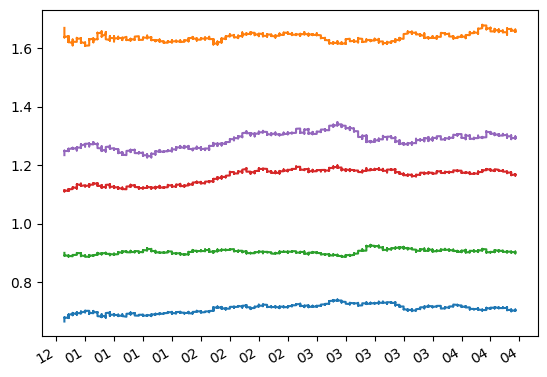

In [37]:
from matplotlib.dates import DateFormatter


fig, ax = plt.subplots()
line1 =ax.plot(dfaudusd_hr['Date'], dfaudusd_hr['bid_close'], label = 'AUD/USD')
line2 =ax.plot(dfeuraud_hr['Date'], dfeuraud_hr['bid_close'], label = 'EUR/AUD')
line3 =ax.plot(dfeurgbp_hr['Date'], dfeurgbp_hr['bid_close'], label = 'EUR/GBP')
line4 =ax.plot(dfeurusd_hr['Date'], dfeurusd_hr['bid_close'], label = 'EUR/USD')
line5 =ax.plot(dfgbpusd_hr['Date'], dfgbpusd_hr['bid_close'], label = 'GBP/USD')
fig.autofmt_xdate()
#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#ax.legend([line1, line2, line3, line4, line5])
#ax.set_title('Bid Open for AU/USD')

In [4]:
#example
# df_open['date'] = pd.to_datetime(df_open['date'])
# df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))

Broken down by Currency Pair

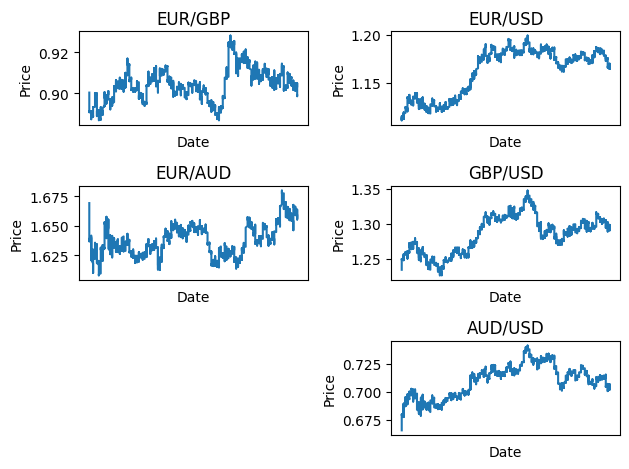

In [25]:
# Placing the plots in the plane
plot1 = plt.subplot2grid((3, 2), (0, 0), colspan=1)
plot2 = plt.subplot2grid((3, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 2), (0, 1), rowspan=1)
plot4 = plt.subplot2grid((3, 2), (1, 1), rowspan=1)
plot5 = plt.subplot2grid((3, 2), (2, 1), rowspan=1)

# Plot for EUR/AUD
plot2.plot(dfeuraud_hr['Date'], dfeuraud_hr['bid_close'])
plot2.set_xticks([])
plot2.set_xlabel('Date')
plot2.set_ylabel('Price')
plot2.set_title('EUR/AUD')

# Plot for EUR/GBP
plot1.plot(dfeurgbp_hr['Date'], dfeurgbp_hr['bid_close'])
plot1.set_xticks([])
plot1.set_xlabel('Date')
plot1.set_ylabel('Price')
plot1.set_title('EUR/GBP')

# Plot for EUR/USD
plot3.plot(dfeurusd_hr['Date'], dfeurusd_hr['bid_close'])
plot3.set_xticks([])
plot3.set_xlabel('Date')
plot3.set_ylabel('Price')
plot3.set_title('EUR/USD')

# Plot for GBP/USD
plot4.plot(dfgbpusd_hr['Date'], dfgbpusd_hr['bid_close'])
plot4.set_xticks([])
plot4.set_xlabel('Date')
plot4.set_ylabel('Price')
plot4.set_title('GBP/USD')

# Plot for AUD/USD
plot5.plot(dfaudusd_hr['Date'], dfaudusd_hr['bid_close'])
plot5.set_xticks([])
plot5.set_xlabel('Date')
plot5.set_ylabel('Price')
plot5.set_title('AUD/USD')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

Candlestick Plots

In [28]:
##### CANDLESTICK CODE #####
fig = go.Figure(data=[go.Candlestick(x=dfaudusd_hr['Date'],
                open=dfaudusd_hr['bid_open'],
                high=dfaudusd_hr['bid_high'],
                low=dfaudusd_hr['bid_low'],
                close=dfaudusd_hr['bid_close'])])

fig.show()
##### Candlestick code #####

In [35]:
fig = go.Figure(data=[go.Candlestick(x=dfeuraud_hr['Date'],
                open=dfeuraud_hr['bid_open'],
                high=dfeuraud_hr['bid_high'],
                low=dfeuraud_hr['bid_low'],
                close=dfeuraud_hr['bid_close'])])

fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=dfeurgbp_hr['Date'],
                open=dfeurgbp_hr['bid_open'],
                high=dfeurgbp_hr['bid_high'],
                low=dfeurgbp_hr['bid_low'],
                close=dfeurgbp_hr['bid_close'])])

fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=dfeurusd_hr['Date'],
                open=dfeurusd_hr['bid_open'],
                high=dfeurusd_hr['bid_high'],
                low=dfeurusd_hr['bid_low'],
                close=dfeurusd_hr['bid_close'])])

fig.show()

In [39]:
fig = go.Figure(data=[go.Candlestick(x=dfgbpusd_hr['Date'],
                open=dfgbpusd_hr['bid_open'],
                high=dfgbpusd_hr['bid_high'],
                low=dfgbpusd_hr['bid_low'],
                close=dfgbpusd_hr['bid_close'])])

fig.show()

In [38]:
x = dfaudusd_hr['bid_open']
y = dfaudusd_hr['ask_open']
#histogram(x)
dfaudusd_hr[['bid_close']].plot(kind='histogram', title = 'AUD/USD')

(array([  8,  29, 190, 331, 299, 268, 700, 315, 275,  71], dtype=int64),
 array([0.66582, 0.67335, 0.68088, 0.68841, 0.69594, 0.70347, 0.711  ,
        0.71853, 0.72606, 0.73359, 0.74112]))

Boxplots

<AxesSubplot: title={'center': 'GBP/USD'}>

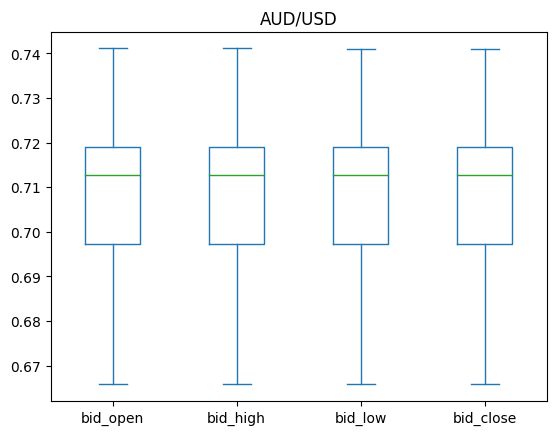

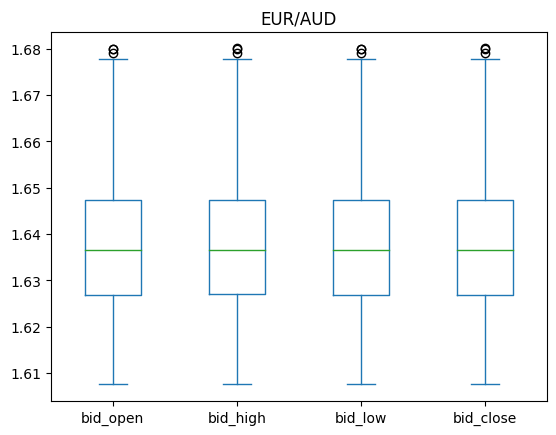

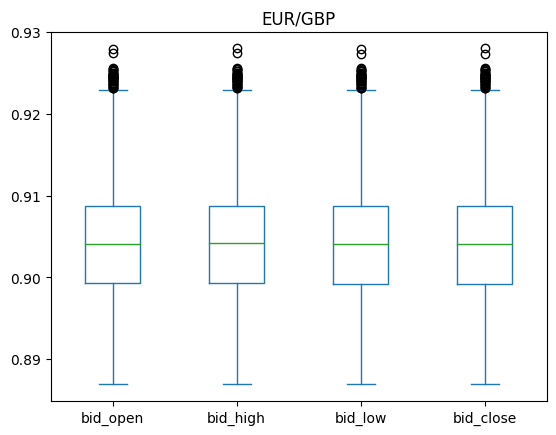

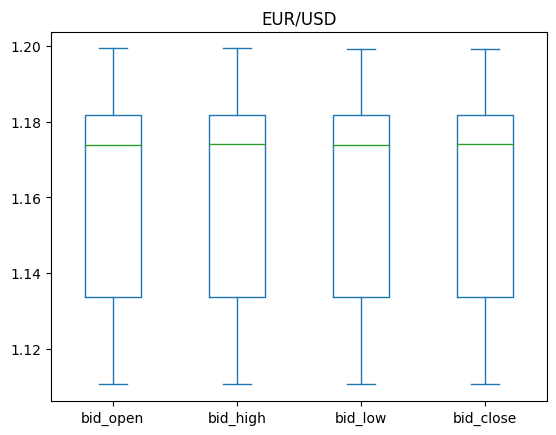

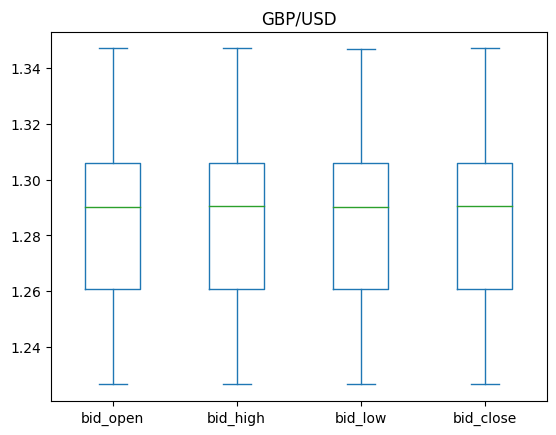

In [ ]:
dfaudusd_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'AUD/USD')
dfeuraud_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/AUD')
dfeurgbp_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/GBP')
dfeurusd_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/USD')
dfgbpusd_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'GBP/USD')

In [7]:
# df_open = dfaudusdse[['date', 'bid_open']]
# df_open['date'] = pd.to_datetime(df_open['date'])
# df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))
# del df_open['date']
# df_open.head()

## Checking stationarity

### Autocovariance and Autocorrelation plots 

In [27]:
# Plotting Autocovariance
autocovariance_audusd = smt.stattools.acovf(dfaudusd_hr['bid_close'], fft=True)
autocovariance_euraud = smt.stattools.acovf(dfeuraud_hr['bid_close'], fft=True)
autocovariance_eurgbp = smt.stattools.acovf(dfeurgbp_hr['bid_close'], fft=True)
autocovariance_eurusd = smt.stattools.acovf(dfeurusd_hr['bid_close'], fft=True)
autocovariance_gbpusd = smt.stattools.acovf(dfgbpusd_hr['bid_close'], fft=True)


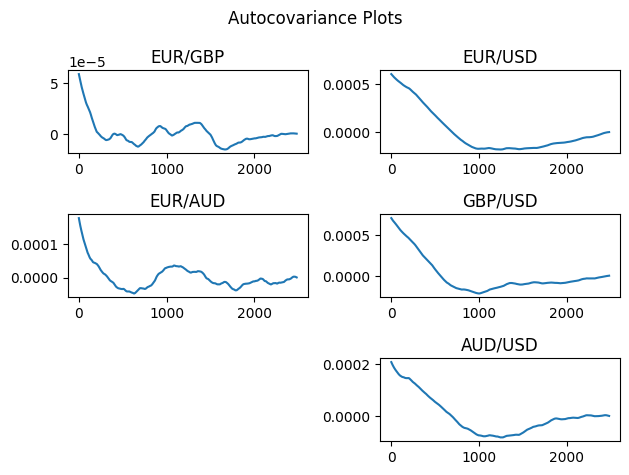

In [28]:
# Placing the plots in the plane
plot1 = plt.subplot2grid((3, 2), (0, 0), colspan=1)
plot2 = plt.subplot2grid((3, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 2), (0, 1), rowspan=1)
plot4 = plt.subplot2grid((3, 2), (1, 1), rowspan=1)
plot5 = plt.subplot2grid((3, 2), (2, 1), rowspan=1)

# Plot for EUR/AUD
plot2.plot(list(range(0,len(autocovariance_euraud))),autocovariance_euraud)
plot2.set_title('EUR/AUD')

# Plot for EUR/GBP
plot1.plot(list(range(0,len(autocovariance_eurgbp))),autocovariance_eurgbp)
plot1.set_title('EUR/GBP')

# Plot for EUR/USD
plot3.plot(list(range(0,len(autocovariance_eurusd))),autocovariance_eurusd)
plot3.set_title('EUR/USD')

# Plot for GBP/USD
plot4.plot(list(range(0,len(autocovariance_gbpusd))),autocovariance_gbpusd)
plot4.set_title('GBP/USD')

# Plot for AUD/USD
plot5.plot(list(range(0,len(autocovariance_audusd))),autocovariance_audusd)
plot5.set_title('AUD/USD')

# Packing all the plots and displaying them
plt.suptitle('Autocovariance Plots')
plt.tight_layout()
plt.show()

Autocovariance is a function that allows for identification of the covariance of the process in between time points. It can be expressed through correlation coefficients between –1 and +1 (y-axis).

Autocovariance plots for the different currency pairs are shown above. These plots are harder to interpret, hence we will instead graph autocorrelation plots to determine stationarity of the time series. 


In [21]:
def autocorrelation_plots(curr_df, name):
    fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2) # create two subplots, one in each row
    smt.graphics.plot_acf(curr_df['bid_close'],lags=10,alpha=0.05, title="Autocorrelation with lags 10", ax=ax)
    smt.graphics.plot_acf(curr_df['bid_close'],lags=50,alpha=0.05, title="Autocorrelation with lags 50",ax=ax2)
    smt.graphics.plot_acf(curr_df['bid_close'],lags=100,alpha=0.05, title="Autocorrelation with lags 100",ax=ax3)
    smt.graphics.plot_acf(curr_df['bid_close'],lags=200,alpha=0.05, title="Autocorrelation with lags 200",ax=ax4)
    fig.suptitle('Autocorrelation ' + str(name))
    fig.tight_layout()
    plt.show()

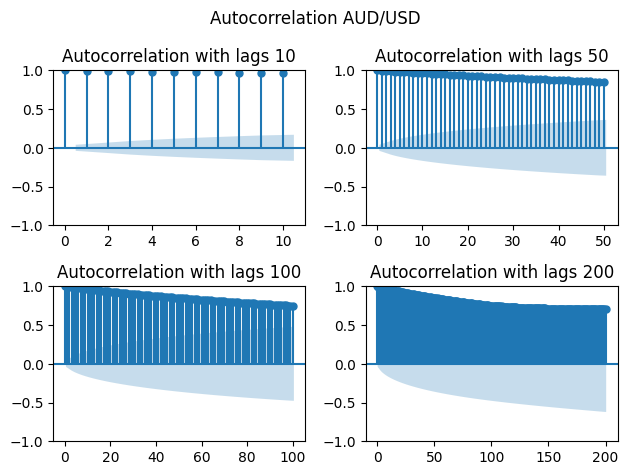

In [22]:
autocorrelation_plots(dfaudusd_hr, 'AUD/USD')

Currency pair AUD/USD is not stationary. In addition, we can see the it is decaying, or decreasing very slowly and remains well above the significant range. This is indicative of a non-stationary series. 

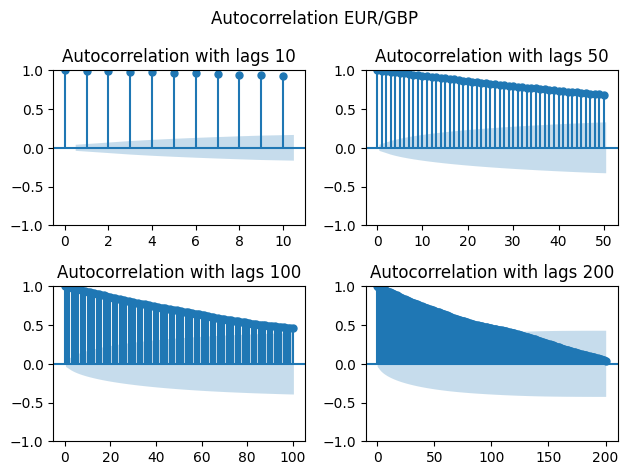

In [23]:
autocorrelation_plots(dfeurgbp_hr, 'EUR/GBP')

We can observe that curreny pair EUR/GBP is stationary with lags over 125. 

For a stationary series, we want to see that the autocorrelation plots show exponential decay, which can be observed above.


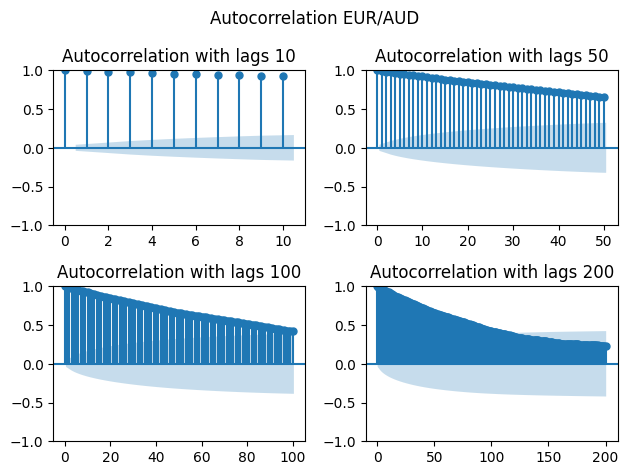

In [24]:
autocorrelation_plots(dfeuraud_hr, 'EUR/AUD')

EUR/AUD has exponential decay, hence is a stationary series.

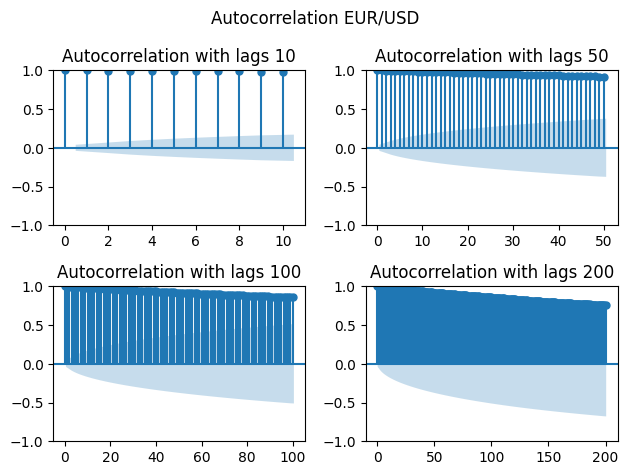

In [25]:
autocorrelation_plots(dfeurusd_hr, 'EUR/USD')

EUR/USD decreases very slowly which suggests non-stationarity.

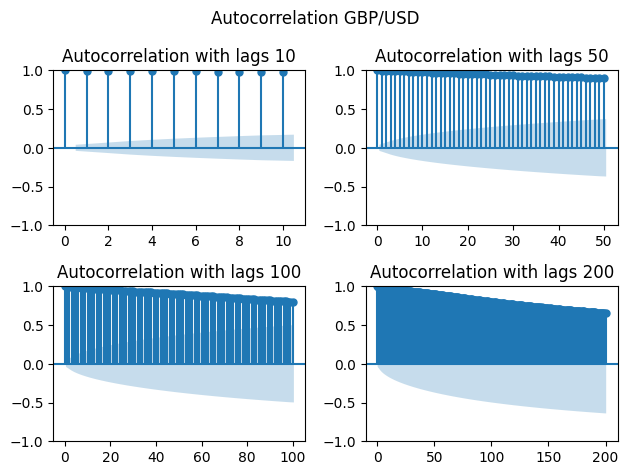

In [26]:
autocorrelation_plots(dfgbpusd_hr, 'GBP/USD')

GBP/USD decreases very slowly which suggests non-stationarity

### Augmented Dickey Fuller test

In [30]:
def adfuller_test(data, field):
    print(f'Hypothesis test on field :{field}')
    print(f'H0: {field} is not stationary, H1: {field} is stationary')
    ADF_stat, p_val, lags, obs, crit, t = adfuller(data[field])
    print(f'ADF Statistic: {ADF_stat}')
    print(f'p-value: {p_val}')
    print(f'lags: {lags}')
    print(f'obs: {obs}')
    print(f'Critical Values: {crit}')
    print(f't: {t}')
    if p_val > 0.05:
        print('Conclusion: Do not reject H0, probably not stationary')
    else:
        print('Conclusion: Reject H0, Is stationary')
    # for key, value in result[4].items():
    #     print('\t{}: {}'.format(key, value))

In [31]:
print("Dickey-Fuller test on AUD/USD")
adfuller_test(dfaudusd_hr, 'bid_close')

Dickey-Fuller test on AUD/USD
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.8573980568904536
p-value: 0.05053104713100041
lags: 1
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -27079.556540167752
Conclusion: Do not reject H0, probably not stationary


In [32]:
print("Dickey-Fuller test on EUR/GBP")
adfuller_test(dfeurgbp_hr, 'bid_close')

Dickey-Fuller test on EUR/GBP
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.919122712434902
p-value: 0.04316904869278075
lags: 1
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -27771.237255219763
Conclusion: Reject H0, Is stationary


In [33]:
print("Dickey-Fuller test on EUR/AUD")
adfuller_test(dfeuraud_hr, 'bid_close')

Dickey-Fuller test on EUR/AUD
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.922679327060934
p-value: 0.04277355024636722
lags: 3
obs: 2482
Critical Values: {'1%': -3.4329874198181174, '5%': -2.86270519435214, '10%': -2.56739027870612}
t: -24614.450540478185
Conclusion: Reject H0, Is stationary


In [34]:
print("Dickey-Fuller test on EUR/USD")
adfuller_test(dfeurusd_hr, 'bid_close')

Dickey-Fuller test on EUR/USD
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.042931854929713
p-value: 0.26807182468197
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -26617.03196613028
Conclusion: Do not reject H0, probably not stationary


In [35]:
print("Dickey-Fuller test on GBP/USD")
adfuller_test(dfgbpusd_hr, 'bid_close')

Dickey-Fuller test on GBP/USD
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.060419007507181
p-value: 0.26072512988547564
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -24835.30088898441
Conclusion: Do not reject H0, probably not stationary


Hence, the Dickey-Fuller tests all support conclusions drawn upon by the Autocorrelation graphs. 

- Currency pairs EUR/GBP and EUR/AUD were found to be stationary series.
- Whereas currency pairs AUD/USD, EUR/USD and GBP/USD were found to be non-stationary series.

## ARIMA model 

Steps for the ARIMA Model:
1) Correct Data Sets
2) Stationarity
3) ACF and PACF
4) Forecasting

Gonna assume the data is fine from previously, so take 1) as done

#### Stationarity

AUD/USD already went through the ADF test and was proven as stationary, let us put the rest of the data through.

In [ ]:
adfuller_test(dfeuraud_hr,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.922679327060934
p-value: 0.04277355024636722
lags: 3
obs: 2482
Critical Values: {'1%': -3.4329874198181174, '5%': -2.86270519435214, '10%': -2.56739027870612}
t: -24614.450540478185
Conclusion: Reject H0, Is stationary


In [ ]:
adfuller_test(dfeurgbp_hr, 'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.919122712434902
p-value: 0.04316904869278075
lags: 1
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -27771.237255219763
Conclusion: Reject H0, Is stationary


In [ ]:
adfuller_test(dfeurusd_hr,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.042931854929713
p-value: 0.26807182468197
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -26617.03196613028
Conclusion: Do not reject H0, probably not stationary


In [ ]:
adfuller_test(dfgbpusd_hr,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.060419007507181
p-value: 0.26072512988547564
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -24835.30088898441
Conclusion: Do not reject H0, probably not stationary


So from the stationarity check, we have aud/usd, eur/aud as stationary datasets, and eur/gbp, gbp/usd as non stationary datasets. We need to work with the non-stationary datasets to convert them to stationary.

In [30]:
dfeurgbp_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.90035,0.90037,0.90033,0.90036,-1,-1.0,-1,0.90044,0.90044,0.90040,0.90042,-1,-1.0,-1,2020-06-01,00:00:00,00:00
3600,2020-06-01 01:00:00+00:00,0.89869,0.89869,0.89862,0.89862,-1,-1.0,-1,0.89873,0.89873,0.89867,0.89867,-1,-1.0,-1,2020-06-01,01:00:00,00:00
7200,2020-06-01 02:00:00+00:00,0.89715,0.89719,0.89715,0.89718,-1,-1.0,-1,0.89718,0.89722,0.89718,0.89722,-1,-1.0,-1,2020-06-01,02:00:00,00:00
10800,2020-06-01 03:00:00+00:00,0.89786,0.89786,0.89785,0.89785,-1,-1.0,-1,0.89791,0.89792,0.89788,0.89790,-1,-1.0,-1,2020-06-01,03:00:00,00:00
14400,2020-06-01 04:00:00+00:00,0.89880,0.89885,0.89878,0.89881,-1,-1.0,-1,0.89884,0.89886,0.89882,0.89883,-1,-1.0,-1,2020-06-01,04:00:00,00:00


In [31]:
dfeurgbp_hr['bid_close'].head()

0        0.90035
3600     0.89869
7200     0.89715
10800    0.89786
14400    0.89880
Name: bid_open, dtype: float64

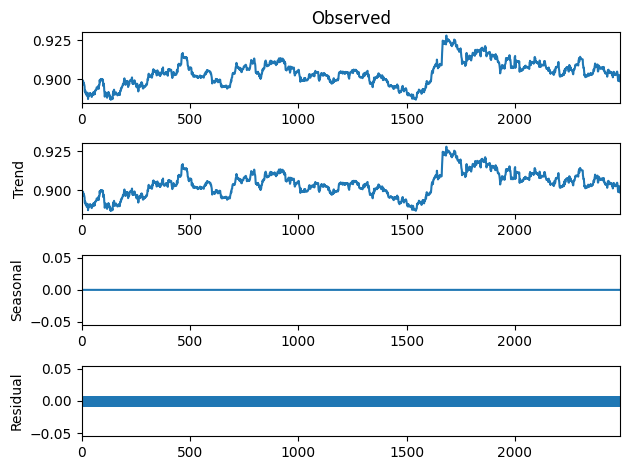

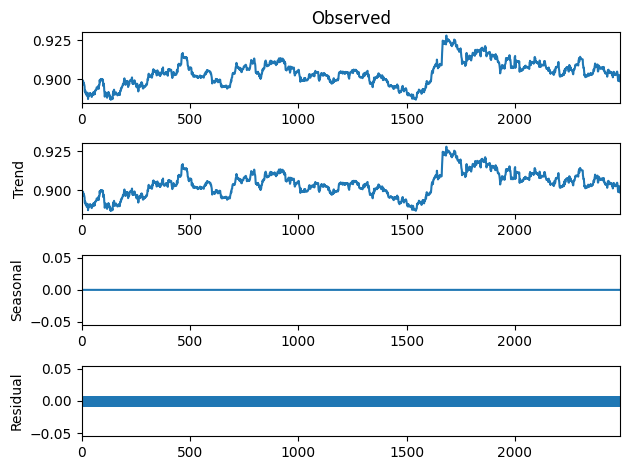

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

eurgbp_list = dfeurgbp_hr['bid_close'].tolist()
observations = seasonal_decompose(eurgbp_list, model = 'additive', period = 1)
observations.plot()



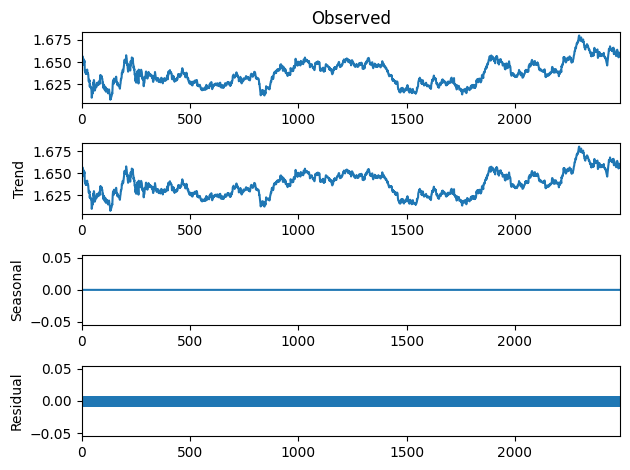

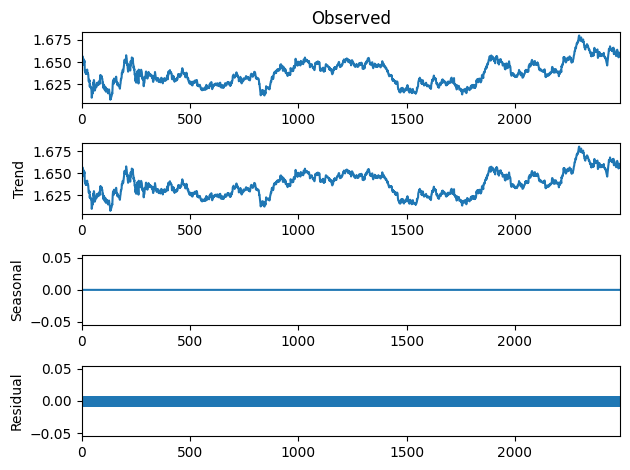

In [33]:
euraud_list = dfeuraud_hr['bid_close'].tolist()
observations = seasonal_decompose(euraud_list, model = 'additive', period = 1)
observations.plot()

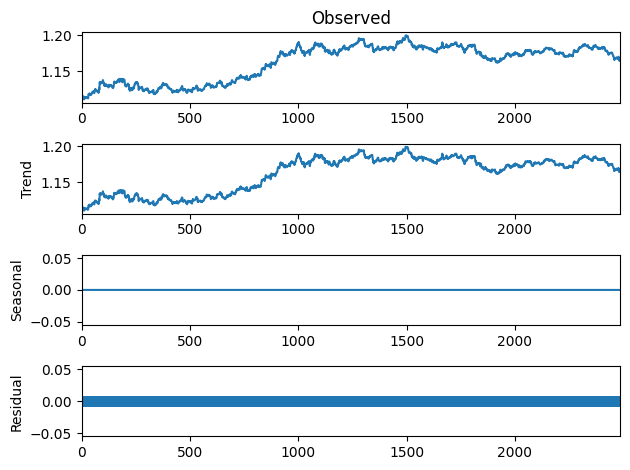

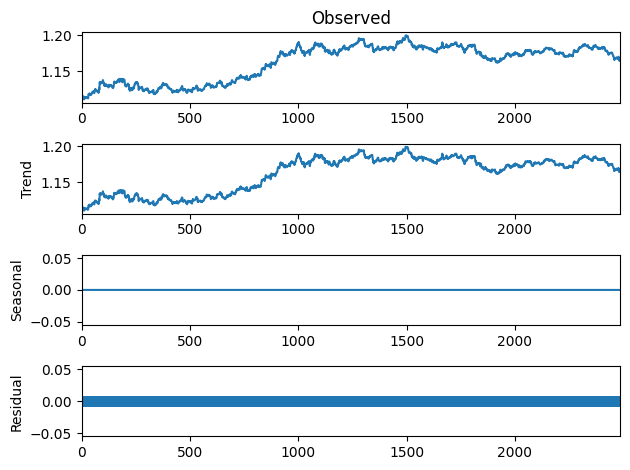

In [35]:
eurusd_list = dfeurusd_hr['bid_close'].tolist()
observations = seasonal_decompose(eurusd_list, model = 'additive', period = 1)
observations.plot()

Graphically, we can see that the two time series have some form of trend. We are going to take the difference between the data points once, and then see if the series become stationary. Can insert equations here later.

In [42]:
dfeurusd_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,1.11157,1.11158,1.11154,1.11154,-1,-1.0,-1,1.11158,1.11160,1.11155,1.11155,-1,-1.0,-1,2020-06-01,00:00:00,00:00
3600,2020-06-01 01:00:00+00:00,1.11217,1.11217,1.11204,1.11206,-1,-1.0,-1,1.11219,1.11219,1.11206,1.11207,-1,-1.0,-1,2020-06-01,01:00:00,00:00
7200,2020-06-01 02:00:00+00:00,1.11341,1.11345,1.11341,1.11345,-1,-1.0,-1,1.11342,1.11347,1.11342,1.11346,-1,-1.0,-1,2020-06-01,02:00:00,00:00
10800,2020-06-01 03:00:00+00:00,1.11374,1.11374,1.11371,1.11371,-1,-1.0,-1,1.11376,1.11376,1.11373,1.11373,-1,-1.0,-1,2020-06-01,03:00:00,00:00
14400,2020-06-01 04:00:00+00:00,1.11329,1.11330,1.11329,1.11330,-1,-1.0,-1,1.11330,1.11331,1.11330,1.11331,-1,-1.0,-1,2020-06-01,04:00:00,00:00


In [54]:
#differencing with the shift function

dfeurusd_diff1 = dfeurusd_hr['bid_close'] - dfeurusd_hr['bid_close'].shift(1)
dfeurusd_diff1 = dfeurusd_diff1.to_frame(name = 'bid_close') #converting series to dataframe with correct column name 
dfeurusd_diff1.head()

0            NaN
3600     0.00052
7200     0.00139
10800    0.00026
14400   -0.00041
Name: bid_close, dtype: float64

In [60]:
type(dfeurusd_diff1)
dfeurusd_diff1.head()

,bid_close
0,NaN
3600,0.00052
7200,0.00139
10800,0.00026
14400,-0.00041


In [68]:
dfeurusd_diff1.dropna()
dfeurusd_diff1
list(dfeurusd_diff1)
dfeurusd_diff1.head(1)
dfeurusd_diff1.isnull()

,bid_close
0,True
3600,False
7200,False
10800,False
14400,False
...,...
57600,False
61200,False
64800,False
68400,False


In [69]:
dfeurusd_diff1.dropna(inplace = True)
dfeurusd_diff1

,bid_close
3600,0.00052
7200,0.00139
10800,0.00026
14400,-0.00041
18000,0.00005
...,...
57600,-0.00304
61200,0.00033
64800,-0.00052
68400,-0.00015


In [70]:
adfuller_test(dfeurusd_diff1,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -49.823753936425476
p-value: 0.0
lags: 0
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -26601.0077325993
Conclusion: Reject H0, Is stationary


As we can see, the series after differencing once, has become stationary. This can be applied to any currency pairing that is not stationary, and differencing can occur indefinitely until stationarity is achieved. We will now move on to forecasting some values. Firstly, we look at the autocorrelation (ACF) and the partial autocorrelation (PACF). We will consider eur/gbp and eur/aud for now.

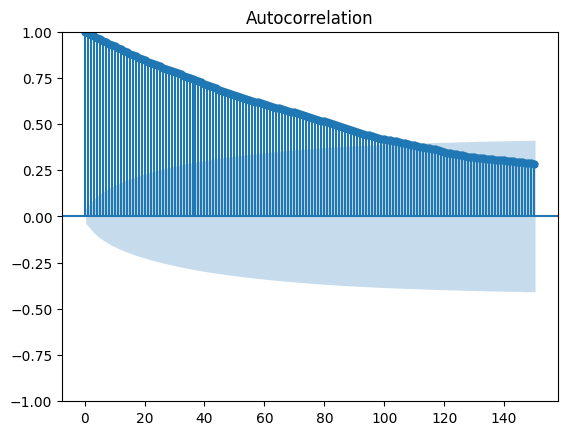

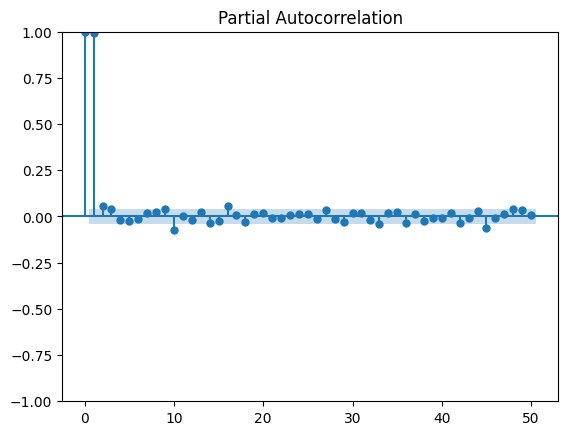

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dfeuraud_hr['bid_close'], lags = 150)
plot_pacf(dfeuraud_hr['bid_close'], lags = 50)

plt.show()

Our ARIMA model is defined by 3 parameters, ARIMA(p,d,q), where p is the number of significant lags in ACF, d is the differencing done, and q is the number of significant lags in PACF. Significant lags are lags outside the blue area in the graphs. So for eur/aud, p = 100, q = 2, d = 0, and this can be finetuned using AIC.

In [87]:
arima_model = ARIMA(dfeuraud_hr['bid_open'], order = (100,0,2))
model = arima_model.fit()

c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [88]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:               bid_open   No. Observations:                 2486
Model:               ARIMA(100, 0, 2)   Log Likelihood               12446.149
Date:                Tue, 18 Oct 2022   AIC                         -24684.299
Time:                        12:36:14   BIC                         -24079.182
Sample:                             0   HQIC                        -24464.550
                               - 2486                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6375      0.005    363.810      0.000       1.629       1.646
ar.L1          0.6015      0.555      1.084      0.278      -0.486       1.689
ar.L2          0.2556      0.726      0.352      0.7

## Supervised learning model

In [26]:
def predictModel(data, ML):
    df_bid = data[['datetime', 'bid_open', 'bid_close', 'bid_volume']]
    df_bid = df_bid.set_index(['datetime'])
    #other features
    df_bid['avg_5'] = df_bid['bid_close'].rolling(window=5).mean()
    df_bid['avg_10'] = df_bid['bid_close'].rolling(window=10).mean()
    df_bid['std_5'] = df_bid['bid_close'].rolling(window=5).std()
    df_bid['std_10'] = df_bid['bid_close'].rolling(window=10).std()
    df_bid['Force_Index'] = df_bid['bid_close'] * df_bid['bid_volume']
    df_bid['RSI_5'] = ta.RSI(np.array(df_bid['bid_close']), timeperiod=5)
    df_bid['Open-Close'] = df_bid['bid_open'] - df_bid['bid_close'].shift(1)
    df_bid['Close_Diff'] = df_bid['bid_close'].diff()
    df_bid = df_bid.dropna()
    X= df_bid
    y = np.where(df_bid['bid_close'].shift(-1) > df_bid['bid_close'], 1,-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    if ML == 'lg':
        model = LogisticRegression().fit(X_train, y_train)
    elif ML == 'rf':
            model = RandomForestRegressor(n_estimators=1000)
            model.fit(X_train, y_train)
    else:
        print("Error: please type 'logistic or randomforest for the model parameter")
    return model, X_train, X_test, y_train, y_test

    
    

### Logisitc Regression

In [27]:
# display both logistic and random forest models for FX pairings
eurgbp_lmodel, eurgbpX_ltrain, eurgbpX_ltest, eurgbpy_ltrain, eurgbpy_ltest = predictModel(dfeurgbp_hr, 'lg')
euraud_lmodel, euraudX_ltrain, euraudX_ltest, euraudy_ltrain, euraudy_ltest = predictModel(dfeuraud_hr, 'lg')

In [10]:
#coefficent
print(f'Coefficient for eurogbp : \n{eurgbp_lmodel.coef_}')
print()
print(f'Coefficent for euroaud : \n{euraud_lmodel.coef_}')

Coefficient for eurogbp : 
[[-3.15694505e-01 -3.16270565e-01  3.32727533e-07]]

Coefficent for euroaud : 
[[-5.93294626e-01 -5.94438028e-01 -2.57962273e-05]]


In [11]:
#probability values
eurgbpl_prob = eurgbp_lmodel.predict_proba(eurgbpX_ltest)
euraudl_prob = euraud_lmodel.predict_proba(euraudX_ltest)
print(f'Probability values for eurgbp: \n{eurgbpl_prob[:5]}')


Probability values for eurgbp: 
[[0.49052208 0.50947792]
 [0.49056787 0.50943213]
 [0.49059315 0.50940685]
 [0.4905434  0.5094566 ]
 [0.49052287 0.50947713]]


In [28]:
#prediction values
eurgbpl_predictvals = eurgbp_lmodel.predict(eurgbpX_ltest)
euraudl_predictvals = euraud_lmodel.predict(euraudX_ltest)
print(f'Probability values for eurgbp: \n {eurgbpl_predictvals[:20]}')

Probability values for eurgbp: 
 [-1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1]


Feature: 0, Score: -0.01352
Feature: 1, Score: -0.01352
Feature: 2, Score: 0.01408
Feature: 3, Score: -0.01359
Feature: 4, Score: -0.01357
Feature: 5, Score: -0.00001
Feature: 6, Score: -0.00002
Feature: 7, Score: 0.01352
Feature: 8, Score: 0.00259
Feature: 9, Score: 0.00004
Feature: 10, Score: 0.00004


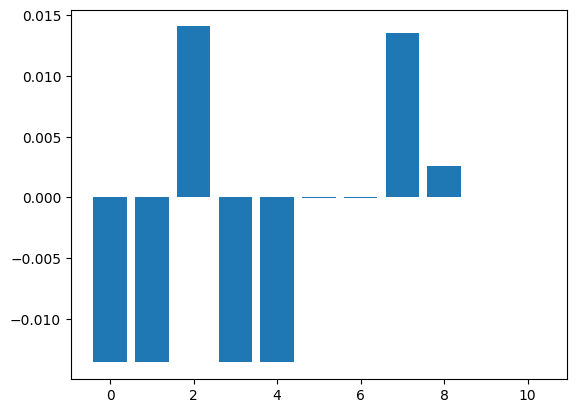

In [29]:
#Testing importance
importance = eurgbp_lmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: -0.12154
Feature: 1, Score: -0.12299
Feature: 2, Score: -0.48339
Feature: 3, Score: -0.08746
Feature: 4, Score: -0.08627
Feature: 5, Score: 0.02938
Feature: 6, Score: 0.02772
Feature: 7, Score: 0.12299
Feature: 8, Score: -0.00279
Feature: 9, Score: -0.05194
Feature: 10, Score: -0.05339


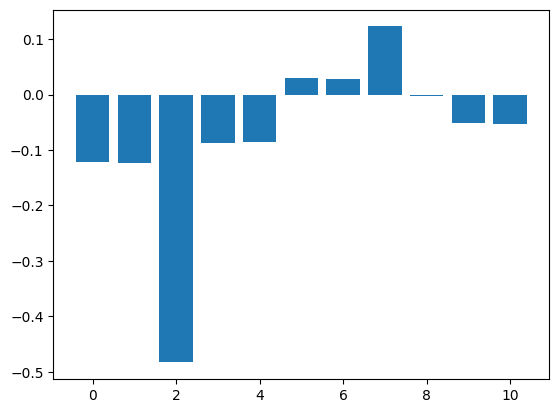

In [30]:
#Testing importance
importance = euraud_lmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest

In [58]:
eurgbp_rmodel, eurgbpX_rtrain, eurgbpX_rtest, eurgbpy_rtrain, eurgbpy_rtest = predictModel(dfeurgbp_hr, 'rf')
euraud_rmodel, euraudX_rtrain, euraudX_rtest, euraudy_rtrain, euraudy_rtest = predictModel(dfeuraud_hr, 'rf')

In [59]:
#coefficent
print(f'Coefficient for eurogbp : \n{eurgbp_lmodel.coef_}')
print()
print(f'Coefficent for euroaud : \n{euraud_lmodel.coef_}')

Coefficient for eurogbp : 
[[-1.35220174e-02 -1.35233715e-02  1.40807378e-02 -1.35859822e-02
  -1.35659983e-02 -8.84117780e-06 -1.58542178e-05  1.35233715e-02
   2.58697266e-03  3.65982835e-05  3.52442211e-05]]

Coefficent for euroaud : 
[[-0.12153727 -0.12298537 -0.48338609 -0.08746442 -0.08626825  0.02937999
   0.02772231  0.12298537 -0.00278647 -0.05194343 -0.05339153]]


In [70]:
#prediction values
eurgbpr_predictvals = eurgbp_rmodel.predict(eurgbpX_rtest)
euraudr_predictvals = euraud_rmodel.predict(euraudX_rtest)
print(f'Probability values for eurgbp: \n {eurgbpr_predictvals[:20]}')

Probability values for eurgbp: 
 [-0.026 -0.098  0.304  0.074  0.17  -0.158  0.15   0.384 -0.28   0.44
  0.038  0.154  0.152  0.15   0.274  0.01   0.062 -0.394  0.012 -0.318]


Feature: 0, Score: -0.01352
Feature: 1, Score: -0.01352
Feature: 2, Score: 0.01408
Feature: 3, Score: -0.01359
Feature: 4, Score: -0.01357
Feature: 5, Score: -0.00001
Feature: 6, Score: -0.00002
Feature: 7, Score: 0.01352
Feature: 8, Score: 0.00259
Feature: 9, Score: 0.00004
Feature: 10, Score: 0.00004


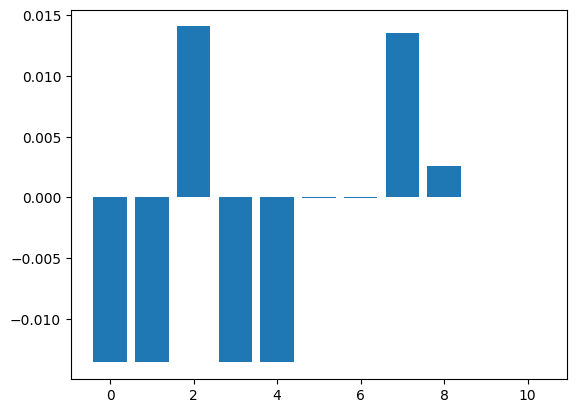

In [62]:
#Testing importance
importance = eurgbp_lmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: -0.12154
Feature: 1, Score: -0.12299
Feature: 2, Score: -0.48339
Feature: 3, Score: -0.08746
Feature: 4, Score: -0.08627
Feature: 5, Score: 0.02938
Feature: 6, Score: 0.02772
Feature: 7, Score: 0.12299
Feature: 8, Score: -0.00279
Feature: 9, Score: -0.05194
Feature: 10, Score: -0.05339


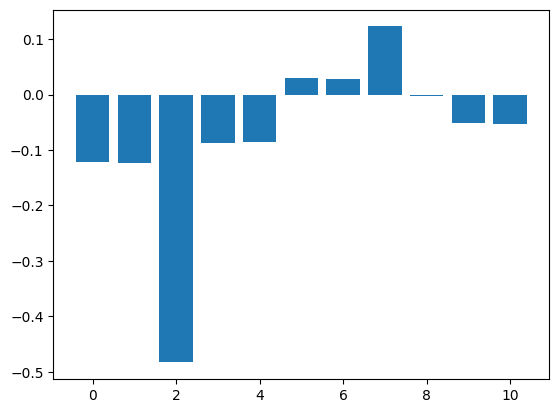

In [91]:
#Testing importance
importance = euraud_lmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Model Evaluation -- phase 

### Logistic model evaluation

In [31]:
print(metrics.confusion_matrix(eurgbpy_ltest, eurgbpl_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(eurgbpy_ltest, eurgbpl_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[ 68 185]
 [ 53 190]]
tn:68, fp:185, fn:53, tp:190


In [32]:
metrics.classification_report(eurgbpy_ltest, eurgbpl_predictvals)

'              precision    recall  f1-score   support\n\n          -1       0.56      0.27      0.36       253\n           1       0.51      0.78      0.61       243\n\n    accuracy                           0.52       496\n   macro avg       0.53      0.53      0.49       496\nweighted avg       0.53      0.52      0.49       496\n'

In [33]:
print(metrics.confusion_matrix(euraudy_ltest, euraudl_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(euraudy_ltest, euraudl_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[203  47]
 [207  39]]
tn:203, fp:47, fn:207, tp:39


In [35]:
metrics.classification_report(euraudy_ltest, euraudl_predictvals)

'              precision    recall  f1-score   support\n\n          -1       0.50      0.81      0.62       250\n           1       0.45      0.16      0.23       246\n\n    accuracy                           0.49       496\n   macro avg       0.47      0.49      0.43       496\nweighted avg       0.47      0.49      0.43       496\n'

In [67]:
def LG_eval_scores(model, predict, X_train, y_train, X_test, y_test):
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 1))
    print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Logistic Regression.')
    print('Accuracy:', round(accuracy_score(y_test, predict),2))

In [68]:
###Comparing both model score results
print('Logistic evaulation metrics')
print('EURGBP:')
LG_eval_scores(eurgbp_lmodel,  eurgbpl_predictvals, eurgbpX_ltrain, eurgbpy_ltrain, eurgbpX_ltest, eurgbpy_ltest)
print('EURAUD:')
LG_eval_scores(euraud_lmodel, euraudl_predictvals, euraudX_ltrain, euraudy_ltrain, euraudX_ltest, euraudy_ltest)

Logistic evaulation metrics
EURGBP:
(R^2) Score: -0.9
Train Score : 51.94% and Test Score : 52.02% using Logistic Regression.
Accuracy: 0.52
EURAUD:
(R^2) Score: -1.0
Train Score : 52.40% and Test Score : 48.79% using Logistic Regression.
Accuracy: 0.49


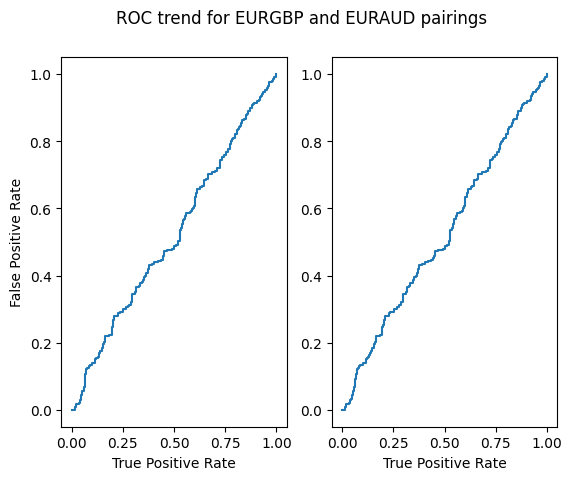

In [90]:
#checking the ROC (Reciever Operating Characteristic Curve) plot.
#This plot displays the sensitivity and specfiicity of the logistic model
eurgbpy_proba = eurgbp_lmodel.predict_proba(eurgbpX_ltest)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(eurgbpy_ltest,  eurgbpy_proba)
auc1 = round(metrics.roc_auc_score(eurgbpy_ltest,  eurgbpy_proba),3)

euraudy_proba = eurgbp_lmodel.predict_proba(euraudX_ltest)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(euraudy_ltest,  euraudy_proba)
auc2 = round(metrics.roc_auc_score(euraudy_ltest, euraudy_proba),3)

#create ROC curve
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('ROC trend for EURGBP and EURAUD pairings')
ax1.plot(fpr1,tpr1)# label="AUC="+str(auc1))
ax2.plot(fpr1,tpr1) #label="AUC="+str(auc2))
#ax1.legend(loc=4)
#ax2.legend(loc=4)

ax1.set(xlabel='True Positive Rate', ylabel='False Positive Rate')
ax2.set(xlabel='True Positive Rate')


plt.show()

Based on the consistent upward trend, this shows that the model method of classifying the data into categories is good.

### Random Forest evaluation

In [69]:
def RF_eval_scores(model, predict, X_train, y_train, X_test, y_test):
    print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
    print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
    print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
    print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
    errors = abs(predict - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.') 

In [74]:
print('Logistic evaulation metrics')
print('EURGBP:')
RF_eval_scores(eurgbp_rmodel, eurgbpr_predictvals, eurgbpX_rtrain, eurgbpy_rtrain, eurgbpX_rtest, eurgbpy_rtest)
print('EURAUD:')
RF_eval_scores(euraud_rmodel, euraudr_predictvals, euraudX_rtrain, euraudy_rtrain, euraudX_rtest, euraudy_rtest)

Logistic evaulation metrics
EURGBP:
Mean Absolute Error: 0.9722
Mean Squared Error: 1.0062
Root Mean Squared Error: 1.0031
(R^2) Score: -0.0066
Train Score : 85.31% and Test Score : -0.66% using Random Tree Regressor.
Accuracy: 106.85 %.
EURAUD:
Mean Absolute Error: 1.0002
Mean Squared Error: 1.1254
Root Mean Squared Error: 1.0609
(R^2) Score: -0.1255
Train Score : 85.55% and Test Score : -12.55% using Random Tree Regressor.
Accuracy: 82.08 %.


## Trading strategy

In [ ]:
###produce bollinger bands here possibly

In [ ]:
split = int(0.7*len(dfaudusd_bid))
dfaudusd_bid['predict_signals'] = model.predict()
dfaudusd_bid['Nifty_returns']  = np.log(dfaudusd_bid['Close']/dfaudusd_bid['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(dfaudusd_bid[split:]['Strategy_returns'])

dfaudusd_bid['Startegy_returns'] = dfaudusd_bid['Nifty_returns']* dfaudusd_bid['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(dfaudusd_bid[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

TypeError: LinearClassifierMixin.predict() missing 1 required positional argument: 'X'